_Alex Malz (NYU)_

# Experiments with plotting the PZ DC1 results

In [1]:
import sys,os
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.use('Agg')
#mpl.rcParams['text.usetex'] = False
#mpl.rcParams['mathtext.rm'] = 'serif'
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['savefig.dpi'] = 250
mpl.rcParams['savefig.format'] = 'pdf'
mpl.rcParams['savefig.bbox'] = 'tight'

# %matplotlib inline

In [3]:
metric_names = ['KS', 'CvM', 'AD']
colors = ['b', 'k', 'r']
#colors = ['royalblue', 'k', 'r']
n_symb = 5
linewidths = [1.3,1.1,1.05]
shapes = [(n_symb, 3, 0), (n_symb-1, 0, 0), (n_symb, 1, 0), (n_symb+1, 2, 0)]

In [4]:
def readTable(tablefile):
    """
    function to read in the table data for KS,CvM, and AD stats
    assumes that the data is in alphabetical order, same as the labels defined in main
    input: 
        tablefile: string listing table filename
    output:
        data: datafile containing the KS, CvM, and two AD stats for the codes
    """
    data = np.loadtxt(tablefile,skiprows=1,usecols=(1,2,3,4))
    return data
    

In [5]:
mpl.__version__

'3.1.0'

In [6]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

def per_metric_helper(ax, n, data, codes):
    #bootstrap_sigmas = np.array([0.01085,6.789,46.855]) #sigmas from bootstrapping for PIT
    #new values for 44k sample!
    bootstrap_sigmas=np.array([0.00968,5.109,36.215]) #sigmas for 44k PIT
    

    #bootstrap_sigmas = np.array([0.0106,6.879, 317.96]) #sigmas from bootstrapping for N(z) 30k
    plot_n = n+1
    in_x = np.arange(len(codes))
    ax_n = ax
    ax_n.semilogy()


#     ax.scatter(in_x, [-1]*len(codes), color='k', alpha=0, marker=shapes[n], s=50, label=metric_names[n])
    n_factor = 0.17 * (plot_n - 2)

    if plot_n>1:
        ax_n = ax.twinx()
        #rot_ang = 270
        rot_ang=90
        label_space = 15.
    else:
        #rot_ang = 90
        rot_ang=90
        label_space = 0.
    if plot_n>2:
        ax_n.spines["right"].set_position(("axes", 1. + 0.1 * (plot_n-1)))
        make_patch_spines_invisible(ax_n)
        ax_n.spines["right"].set_visible(True)
    
    #if n != 0:
    #    data[n] *= -1.
    ax_n.semilogy()
    ### set ylim fixed
    tp = np.log10(np.amax(data[n]))
    bt = np.log10(np.amin(data[n]))
    dely = 10.**(0.13*(tp-bt))
    
    ax_n.set_ylim(np.amin(data[n])/dely,np.amax(data[n])*dely)

    
    handle = ax_n.scatter(in_x+n_factor, data[n], marker=shapes[plot_n], s=40, color=colors[n], label=metric_names[n])
    handle2, = ax_n.plot([np.amin(in_x),np.amax(in_x)],[bootstrap_sigmas[n],bootstrap_sigmas[n]],lw=linewidths[n],color=colors[n],
              linestyle='--',label=metric_names[n])
    #ax_n.plot([np.amin(in_x),np.amax(in_x)],[bootstrap_sigmas[n]*2.,bootstrap_sigmas[n]*2.],lw=1.35,color=colors[n])
    ax_n.set_ylabel(metric_names[n], rotation=rot_ang, fontsize=14, labelpad=label_space)
    print('plotted '+metric_names[n]+': '+str(data[n]))
    return(ax, ax_n, handle,handle2)

def metric_plot(codes, data):
    xs = np.arange(len(codes))
    
    fig, ax = plt.subplots()
    fig.subplots_adjust(right=1.)
    plt.xticks(xs, codes, rotation=45)
    plt.xlabel('Photo-z code', fontsize=14)



    handles = []
    #handles, labels = ax.get_legend_handles_labels()
#     for name in metric_names:
#         handles.append(ax.scatter([0], [0], alpha=0.))
    for n in range(len(metric_names)):
        (ax, ax_n, handle,handle2) = per_metric_helper(ax, n, data, codes)
        handles.append(handle)
        handles.append(handle2)
#     plt.xticklabels(codes)
    #plt.xticks(xs, codes, rotation='vertical')
    #plt.xticks(xs, codes, rotation=45)
    #plt.subplots_adjust(bottom=-0.15)
    
    newnames = metric_names[:]
    print(newnames)
    for n in range(len(metric_names)):
        newnames.insert(2*n+1,f"{metric_names[n]} bootstrap error")
    print(newnames)
    #plt.legend(handles, metric_names,loc='lower left',scatterpoints=1)
    plt.legend(handles, newnames,bbox_to_anchor=(0., 1.0, 1., .10),ncol=3,loc='lower left',fontsize=10)


#     plt.savefig('KSvsCvmvsAD.png')
    return(fig)

In [7]:
def pitmain():
    codes = ("ANNZ2","BPZ","DELIGHT","EAZY","FLEXZ","GPZ","LEPHARE","METAPHOR","CMNN","SKYNET","TPZ","TRAINZ")
    labels = ("ANNz2","BPZ","Delight","EAZY","FlexZBoost","GPz","LePhare","METAPhoR","NN","SkyNet","TPZ","TrainZ")
    labeldict = dict(zip(codes,labels))

    statdata = readTable("PITtabledata_withnull.dat")
    
    all_ks = statdata[:,0]
    all_cvm = statdata[:,1]
    all_ad = statdata[:,3]
    print (all_ks)
    print (all_cvm)
    print (all_ad)
    
    metric_data = np.array([all_ks, all_cvm, all_ad])
    fig = metric_plot(codes, metric_data)
    #plt.xticks(np.arange(len(codes)),codes,rotation=45)
    #plt.title("PIT Stats")
    plt.savefig("KSvsCvMvsAD_PIT_withnull_44k.pdf", format='pdf')

In [8]:
##pitmain()

In [9]:
#print ssdfsdjl

In [10]:
def nzmain():
    codes = ("ANNZ2","BPZ","DELIGHT","EAZY","FLEXZ","GPZ","LEPHARE","METAPHOR","CMNN","SKYNET","TPZ","TRAINZ")
    labels = ("ANNz2","BPZ","Delight","EAZY","FlexZBoost","GPz","LePhare","METAPhoR","NN","SkyNet","TPZ","TrainZ")
    labeldict = dict(zip(codes,labels))

    statdata = readTable("NZtabledata_withnull.dat")
    
    all_ks = statdata[:,0]
    all_cvm = statdata[:,1]
    all_ad = statdata[:,3]
    print (all_ks)
    print (all_cvm)
    print (all_ad)
    
    metric_data = np.array([all_ks, all_cvm, all_ad])
    fig = metric_plot(codes, metric_data)
    #plt.title("N(z) Stats")
    #plt.xticks(np.arange(len(codes)),codes,rotation=45)
   
    plt.savefig("KSvsCvMvsAD_NZ_withnull_44k.pdf", format='pdf')

[0.0237 0.0131 0.0256 0.0441 0.0128 0.0206 0.0254 0.035  0.0043 0.0483
 0.0126 0.0048]
[ 25.676  17.587  42.341 169.977   7.007  19.103  58.9    60.79    0.538
 385.83    9.483   1.161]
[ 276.   170.9  253.2  833.3  126.9  230.4  472.   672.3    5.8 2110.3
  110.6    8.3]
plotted KS: [0.0237 0.0131 0.0256 0.0441 0.0128 0.0206 0.0254 0.035  0.0043 0.0483
 0.0126 0.0048]
plotted CvM: [ 25.676  17.587  42.341 169.977   7.007  19.103  58.9    60.79    0.538
 385.83    9.483   1.161]
plotted AD: [ 276.   170.9  253.2  833.3  126.9  230.4  472.   672.3    5.8 2110.3
  110.6    8.3]
['KS', 'CvM', 'AD']
['KS', 'KS bootstrap error', 'CvM', 'CvM bootstrap error', 'AD', 'AD bootstrap error']


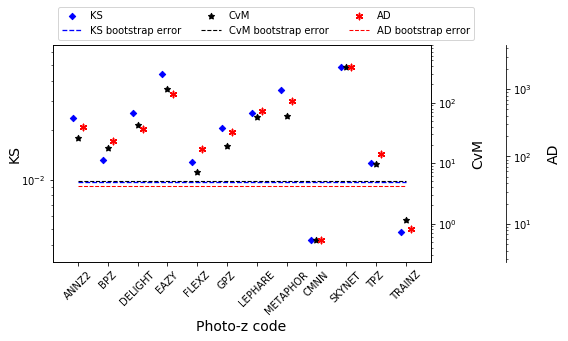

In [11]:
nzmain()